# MNIST classification

The MNIST database of grayscale handwritten digits, available from this page http://yann.lecun.com/exdb/mnist/, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data.

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## The MNIST Dataset

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Digit images are stored as 784-D vectors**. Each component represents the grayscale value of a pixel.

In [6]:
data = mnist['data']
data.shape

(70000, 784)

In [17]:
target = mnist['target']
target.shape
#target.head()

(70000,)

### Visualize MNIST image
We'll visutalize the **1st** sample image in the dataset. First reshape it into a 28-by-28 matrix array

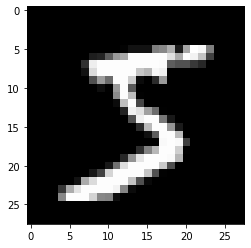

In [7]:
img = data.values[0].reshape(28,28)
plt.imshow(img, cmap="gray")

In [13]:
data1 = data.values.reshape(70000,28,28)

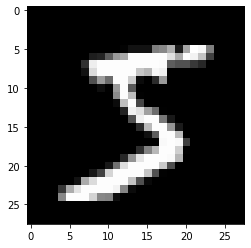

In [14]:
plt.imshow(data1[0], cmap="gray")

Print out the label (or digit) of the chosen image

In [18]:
print(target[0])

5


Show the image using **imshow()** with the aurgments **cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255)**

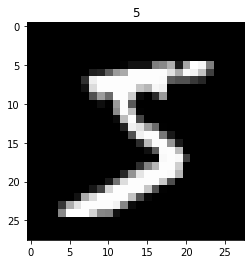

In [19]:
plt.figure(figsize=(8,4));
# use imshow below
plt.title(target[0])
plt.imshow(data1[0], cmap=plt.cm.gray,interpolation="nearest",clim=(0, 255))

## Logistic Regression on MNIST

Splitting original dataset into 10000 samples for testing and 60000 for training, set **random_state=101**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=10000, random_state=101)

### Training

Build a logistic regression model using default settings

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

Fit the logistic regression model on training data and print out the running time for training process. It'll take a long time. Ignore the warnings. 

In [24]:
import time
start = time.time()
logmodel.fit(x_train,y_train)
print("Total time: ", time.time() - start, "seconds")


Total time:  46.7641761302948 seconds


### Testing

Make predictions on test data and print out the classification report

In [25]:
from sklearn.metrics import classification_report
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1008
           1       0.96      0.97      0.97      1097
           2       0.92      0.90      0.91       989
           3       0.89      0.89      0.89      1046
           4       0.94      0.92      0.93       960
           5       0.90      0.86      0.88       913
           6       0.93      0.95      0.94      1005
           7       0.93      0.93      0.93      1068
           8       0.88      0.89      0.89       940
           9       0.88      0.91      0.90       974

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Dimensional reduction by PCA 

In [26]:
from sklearn.decomposition import PCA

Keep 100 principal components of the data (stored in vector form)

In [27]:
pca = PCA(n_components=100)
pca.fit(data)

PCA(n_components=100)

Transform MNIST data to its first 100 principal components using **transform()**

In [28]:
data_pca = pca.transform(data)

Print out the dimension of data array after PCA

In [29]:
print("original shape:   ", data.shape)
print("transformed shape:", data_pca.shape)

original shape:    (70000, 784)
transformed shape: (70000, 100)


### Visualize the processed image

You need to first transform the PCA data back to the original coordinate system under standard basis. Simply use the attribute **inverse_transform()** for this 

In [30]:
data_new = pca.inverse_transform(data_pca) # transform back into the original system
print("inverse transform:", data_new.shape)

inverse transform: (70000, 784)


Plot the orignal image and processed image (by PCA) side by side

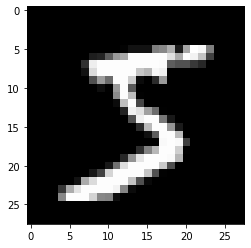

In [37]:
plt.figure(figsize=(8,4));

# Original Image
plt.imshow(data.values[0].reshape(28,28), cmap="gray")
# 100 principal components
#plt.imshow(data_pca[0].reshape(10,10),cmap="gray")



## Logistic Regression with PCA

Splitting processed PCA data into 10000 samples for testing and 60000 for training, set **random_state=101**

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data_pca, target, test_size=10000, random_state=101)

### Training 

Fit the logistic regression model on PCA data and print out the training time. Ignore the warnings.

In [40]:
import time
start = time.time()
logmodel.fit(x_train,y_train)
print("Total time: ", time.time() - start, "seconds")

Total time:  12.375515699386597 seconds


As we can see, dimensional reduction via PCA dramatically speeds up the training.

### Testing

Make predictions on test data and print out the classification report

In [41]:
from sklearn.metrics import classification_report
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1008
           1       0.93      0.97      0.95      1097
           2       0.93      0.89      0.91       989
           3       0.90      0.88      0.89      1046
           4       0.91      0.92      0.91       960
           5       0.89      0.85      0.87       913
           6       0.92      0.96      0.94      1005
           7       0.91      0.93      0.92      1068
           8       0.91      0.86      0.88       940
           9       0.89      0.90      0.89       974

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

